In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.concat([yellow_22,yellow_23, green_22, green_23, fhvhv_22, fhvhv_23], ignore_index=True)

In [70]:
df.to_csv('../../Datasets/samples/merged_sample.csv')

In [61]:
df['co2_emissions'] = 238 * (df['trip_time']/3600) / df['trip_distance']

In [62]:
df

,PULocationID,DOLocationID,trip_distance,total_amount,year,month,day,hour,trip_time,Service_type_id,co2_emissions
0,151,239,1.260,12.00,2022,6,15,14,471,0,24.712963
1,4,148,1.400,15.35,2022,6,12,0,744,0,35.133333
2,170,170,0.300,9.00,2022,6,11,13,173,0,38.124074
3,163,237,0.670,16.30,2022,6,21,16,553,0,54.566335
4,100,141,2.650,16.44,2022,6,5,2,594,0,14.818868
...,...,...,...,...,...,...,...,...,...,...,...
3629495,61,63,4.720,23.07,2023,6,5,0,1312,1,18.376648
3629496,197,135,3.990,16.05,2023,6,8,20,1086,1,17.994152
3629497,146,138,4.830,26.79,2023,6,4,12,1083,1,14.823671
3629498,148,37,4.788,23.46,2023,6,25,1,1223,1,16.886777


In [63]:
df.describe()

,PULocationID,DOLocationID,trip_distance,total_amount,year,month,day,hour,trip_time,Service_type_id,co2_emissions
count,3.629500e+06,3.629500e+06,3.629500e+06,3.629500e+06,3.629500e+06,3.629500e+06,3.629500e+06,3.629500e+06,3.629500e+06,3.629500e+06,3.629500e+06
mean,1.387141e+02,1.376341e+02,4.566111e+00,2.349087e+01,2.022520e+03,6.000006e+00,1.536824e+01,1.338549e+01,1.671358e+03,9.780962e-01,2.936046e+01
std,7.500059e+01,7.515258e+01,4.500869e+00,1.698080e+01,5.002839e-01,5.196242e-03,8.612992e+00,6.512107e+00,5.630538e+05,1.463696e-01,9.523238e+03
min,1.000000e+00,1.000000e+00,3.000000e-03,1.000000e-02,2.002000e+03,5.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,3.366146e-03
25%,7.500000e+01,7.400000e+01,1.580000e+00,1.177000e+01,2.022000e+03,6.000000e+00,8.000000e+00,9.000000e+00,5.980000e+02,1.000000e+00,1.493729e+01
50%,1.400000e+02,1.380000e+02,2.904000e+00,1.868000e+01,2.023000e+03,6.000000e+00,1.500000e+01,1.400000e+01,9.510000e+02,1.000000e+00,2.084131e+01
75%,2.110000e+02,2.080000e+02,5.870000e+00,2.948000e+01,2.023000e+03,6.000000e+00,2.300000e+01,1.900000e+01,1.484000e+03,1.000000e+00,2.729933e+01
max,2.630000e+02,2.630000e+02,6.694200e+02,6.420000e+02,2.023000e+03,1.000000e+01,3.100000e+01,2.300000e+01,6.193180e+08,1.000000e+00,1.749731e+07


### HISTOGRAMA

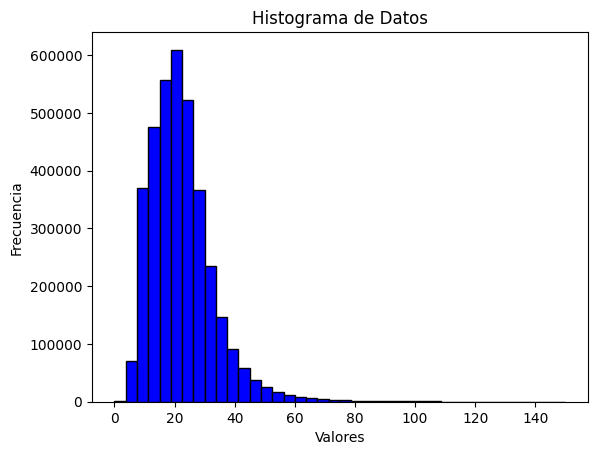

In [66]:
# Datos que deseas representar en el histograma
data =  df['co2_emissions']

# Crear el histograma
plt.hist(data, bins=40, color='blue', edgecolor='black', range=(0,150))

# Personalizar el histograma (opcional)
plt.title('Histograma de Datos')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

Nuestra variable objetivo son las emisiones de carbono de cada viaje, calculada a partir de la distancia recorrida, el tiempo en que se realizó el viaje y la emisión promedio de nuestro top 10 de vehículos por milla. Ya que, para nuestra empresa, la reducción de las emisiones de carbono también se relaciona con que los viajes a realizarse sean más largos y en menor tiempo, evitando las horas pico y aportar al tránsito.

Observamos que los datos poseen una distribución normal con cola hacia la derecha y mayor concentración de valores a la izquierda.

Analizando las muestras estadísticas, vemos que tiene una media de 29 de gramos por hora sobre milla, y el 75% de los casos tienen menos de 27.3 gramos de co2 emitidos.

Teniendo en cuenta esto, y que nuestro enfoque apunta a minimizar el impacto ambiental de cada viaje, tendremos en cuenta el 25% con menor cantidad de emisiones para poder incentivar económicamente este tipo de viajes.

In [68]:
umbral = 14.93
etiquetas = ['Y', 'N']
# Aplicar la transformación
df['Discount'] = pd.cut(df['co2_emissions'], bins=[-float('inf'), umbral, float('inf')], labels=etiquetas)
df.head()

,PULocationID,DOLocationID,trip_distance,total_amount,year,month,day,hour,trip_time,Service_type_id,co2_emissions,Discount
0,151,239,1.26,12.00,2022,6,15,14,471,0,24.712963,N
1,4,148,1.40,15.35,2022,6,12,0,744,0,35.133333,N
2,170,170,0.30,9.00,2022,6,11,13,173,0,38.124074,N
3,163,237,0.67,16.30,2022,6,21,16,553,0,54.566335,N
4,100,141,2.65,16.44,2022,6,5,2,594,0,14.818868,Y


--------------- Modificar


Estamos tomando la relacion entre el costo y la distancia (esto seria el costo por milla) para evaluar la distribucion de esta variable teniendo en cuenta que los valores mas altos de esta variable corresponderian a los viajes en los que hay mayor cantidad de transito, mientras que los valores menores corresponderian a los momentos en los que hay menor cantidad de transito. Para esto analizamos la distribucion con el siguiente histograma, y la descripcion a partir de la media, el desvio standar y los valores de los cuartiles.

---------------------- Modificar

Definimos tomar como valor umbral para la clasificacion de los viajes con y sin descuento al valor limite del primer cuartil. De esta forma el 25% de los viajes con menor costo por milla tendrian la clasificacion "Y" (positiva para el descuento) para esto viajes ofrecerles un menor costo, incentivando la movilidad en los horarios con menor congestion de transito. Por otro lado el 75% de los viajes quedara con la clasificacion "N" (negativa para el descuento) a la cual no se le afectara el monto de la tarifa. Teniendo en cuenta esta columna, como nuestra variable objetivo, vamos a entrenar distintos modelos de machine Learning:
 - Regresion Logistica
 - K vecinos
 - Arbol de decision
Con el fin de ver cual es el modelo optimo para predecir a que viajes se le aplicaran descuentos, teniendo en cuenta como caracteristicas las variables distancia('trip_distance'), dia(day) y tiempo de viaje('trip_time').

Por ultimo vamos a priorizar el modelo que de menor valor de falsos positivos (recall), ya que nos intera la viabilidad econoica de la empresa, considerando que esta en sus inicios.

In [ ]:
sns.pairplot(df, hue="Discount", palette = ['r', 'b'])
plt.show()

In [88]:
# Las características se almacenan en X y la variable objetivo en y
y=  df['Discount']#--> v objetivo
X= df[['PULocationID',	'DOLocationID','hour', 'day', 'year','month']]
# División de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creación del modelo de Regresión Logística
model = LogisticRegression()

# Entrenamiento del modelo en el conjunto de entrenamiento
model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')



/home/dai/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dai/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.7496445791431326
Confusion Matrix:
[[544167      0]
 [181733      0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86    544167
           1       0.00      0.00      0.00    181733

    accuracy                           0.75    725900
   macro avg       0.37      0.50      0.43    725900
weighted avg       0.56      0.75      0.64    725900



/home/dai/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In summary, our model has difficulty predicting the "N" class and performs reasonably well on the "Y" class. You may need to adjust or improve your model, especially if you are interested in predicting the "N" class.

In [89]:
df.shape

(3629500, 12)

In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Cargar tus datos en un DataFrame, asegurándote de que las características y la columna de clasificación estén en su lugar
# Por ejemplo, asumiendo que ya tienes los datos cargados y preprocesados en 'data'

#Codificar la variable categórica 'classification' en valores numéricos
label_encoder = LabelEncoder()
df['Discount'] = label_encoder.fit_transform(df['Discount'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df[['PULocationID',	'DOLocationID','hour', 'day','year','month']] # Características
y = df['Discount']  # Etiquetas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo KNN
k = 2  # Valor de k (número de vecinos)
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.8290246590439454
Confusion Matrix:
[[523701  20466]
 [103645  78088]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89    544167
           1       0.79      0.43      0.56    181733

    accuracy                           0.83    725900
   macro avg       0.81      0.70      0.73    725900
weighted avg       0.82      0.83      0.81    725900



In conclution, this model performs significantly better than the previous model. It has high accuracy, strong performance in predicting class "0" (high precision, recall, and F1-score), and reasonable performance in predicting class "1."

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Codificar la variable categórica 'classification' en valores numéricos
label_encoder = LabelEncoder()
df['Discount'] = label_encoder.fit_transform(df['Discount'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df[['PULocationID',	'DOLocationID','hour', 'day', 'year','month']] # Características
y = df['Discount']  # Etiquetas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo KNN
k = 3  # Valor de k (número de vecinos)
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.8345722551315609
Confusion Matrix:
[[496129  48038]
 [ 72046 109687]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89    544167
           1       0.70      0.60      0.65    181733

    accuracy                           0.83    725900
   macro avg       0.78      0.76      0.77    725900
weighted avg       0.83      0.83      0.83    725900



In summary, this model also performs well, with a high accuracy and strong performance in predicting class "0," and reasonably good performance in predicting class "1." The reason is the new number of K, here K is 3, while in the previuos model it was 2. As it has a better recall for both, negative and positive results, this is a stronger model for our case.

In [76]:
# Codificar la variable categórica 'classification' en valores numéricos
label_encoder = LabelEncoder()
df['Discount'] = label_encoder.fit_transform(df['Discount'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df[['PULocationID',	'DOLocationID','hour', 'day', 'year','month']] # Características
y = df['Discount']  # Etiquetas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo KNN
k = 4  # Valor de k (número de vecinos)
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.8339909078385452
Confusion Matrix:
[[516369  27798]
 [ 92708  89025]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90    544167
           1       0.76      0.49      0.60    181733

    accuracy                           0.83    725900
   macro avg       0.80      0.72      0.75    725900
weighted avg       0.83      0.83      0.82    725900



In [77]:
# Codificar la variable categórica 'classification' en valores numéricos
label_encoder = LabelEncoder()
df['Discount'] = label_encoder.fit_transform(df['Discount'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df[['PULocationID',	'DOLocationID','hour', 'day', 'year','month']] # Características
y = df['Discount']  # Etiquetas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo KNN
k = 5  # Valor de k (número de vecinos)
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.8386265325802452
Confusion Matrix:
[[501186  42981]
 [ 74160 107573]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90    544167
           1       0.71      0.59      0.65    181733

    accuracy                           0.84    725900
   macro avg       0.79      0.76      0.77    725900
weighted avg       0.83      0.84      0.83    725900



In [78]:
# Codificar la variable categórica 'classification' en valores numéricos
label_encoder = LabelEncoder()
df['Discount'] = label_encoder.fit_transform(df['Discount'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df[['PULocationID',	'DOLocationID','hour', 'day', 'year','month']] # Características
y = df['Discount']  # Etiquetas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo KNN
k = 1  # Valor de k (número de vecinos)
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.8177476236396198
Confusion Matrix:
[[481908  62259]
 [ 70038 111695]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88    544167
           1       0.64      0.61      0.63    181733

    accuracy                           0.82    725900
   macro avg       0.76      0.75      0.75    725900
weighted avg       0.82      0.82      0.82    725900



In [79]:
# Codificar la variable categórica 'classification' en valores numéricos
label_encoder = LabelEncoder()
df['Discount'] = label_encoder.fit_transform(df['Discount'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df[['PULocationID',	'DOLocationID','hour', 'day', 'year','month']] # Características
y = df['Discount']  # Etiquetas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo KNN
k = 6  # Valor de k (número de vecinos)
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.8370478027276484
Confusion Matrix:
[[515230  28937]
 [ 89350  92383]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90    544167
           1       0.76      0.51      0.61    181733

    accuracy                           0.84    725900
   macro avg       0.81      0.73      0.75    725900
weighted avg       0.83      0.84      0.83    725900



In [80]:
# Codificar la variable categórica 'classification' en valores numéricos
label_encoder = LabelEncoder()
df['Discount'] = label_encoder.fit_transform(df['Discount'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df[['PULocationID',	'DOLocationID','hour', 'day', 'year','month']] # Características
y = df['Discount']  # Etiquetas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo KNN
k = 7  # Valor de k (número de vecinos)
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.8400413280066125
Confusion Matrix:
[[503794  40373]
 [ 75741 105992]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90    544167
           1       0.72      0.58      0.65    181733

    accuracy                           0.84    725900
   macro avg       0.80      0.75      0.77    725900
weighted avg       0.83      0.84      0.83    725900



In [81]:
# Codificar la variable categórica 'classification' en valores numéricos
label_encoder = LabelEncoder()
df['Discount'] = label_encoder.fit_transform(df['Discount'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df[['PULocationID',	'DOLocationID','hour', 'day', 'year','month']] # Características
y = df['Discount']  # Etiquetas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo KNN
k = 8  # Valor de k (número de vecinos)
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.8381154428984708
Confusion Matrix:
[[514523  29644]
 [ 87868  93865]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90    544167
           1       0.76      0.52      0.62    181733

    accuracy                           0.84    725900
   macro avg       0.81      0.73      0.76    725900
weighted avg       0.83      0.84      0.83    725900



In [83]:
# Codificar la variable categórica 'classification' en valores numéricos
label_encoder = LabelEncoder()
df['Discount'] = label_encoder.fit_transform(df['Discount'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df[['PULocationID',	'DOLocationID','hour', 'day', 'year','month']] # Características
y = df['Discount']  # Etiquetas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo KNN
k = 9  # Valor de k (número de vecinos)
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.8403430224548836
Confusion Matrix:
[[505462  38705]
 [ 77190 104543]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90    544167
           1       0.73      0.58      0.64    181733

    accuracy                           0.84    725900
   macro avg       0.80      0.75      0.77    725900
weighted avg       0.83      0.84      0.83    725900



In [84]:
# Codificar la variable categórica 'classification' en valores numéricos
label_encoder = LabelEncoder()
df['Discount'] = label_encoder.fit_transform(df['Discount'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df[['PULocationID',	'DOLocationID','hour', 'day', 'year','month']] # Características
y = df['Discount']  # Etiquetas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo KNN
k = 10  # Valor de k (número de vecinos)
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.8385190797630527
Confusion Matrix:
[[514180  29987]
 [ 87232  94501]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.90    544167
           1       0.76      0.52      0.62    181733

    accuracy                           0.84    725900
   macro avg       0.81      0.73      0.76    725900
weighted avg       0.83      0.84      0.83    725900



In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Cargar tus datos en un DataFrame, asegurándote de que las características y la columna de clasificación estén en su lugar
# Por ejemplo, asumiendo que ya tienes los datos cargados y preprocesados en 'data'

# Codificar la variable categórica 'classification' en valores numéricos
label_encoder = LabelEncoder()
df['Discount'] = label_encoder.fit_transform(df['Discount'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df[['PULocationID',	'DOLocationID','hour', 'day', 'year','month']] # Características
y = df['Discount']  # Etiquetas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Árboles de Decisión
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.8434784405565505
Confusion Matrix:
[[490842  53325]
 [ 60294 121439]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90    544167
           1       0.69      0.67      0.68    181733

    accuracy                           0.84    725900
   macro avg       0.79      0.79      0.79    725900
weighted avg       0.84      0.84      0.84    725900



In summary, this model performs reasonably well with a good accuracy. It has strong performance in predicting class "0" and moderate performance in predicting class "1.". Howerver, this model has a good presition at predicting true positivies and avoiding false positivies, the previuos model has an overall better performance in every metric.

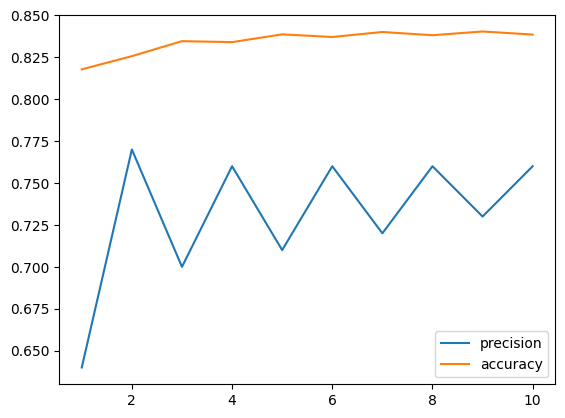

In [87]:
validation_curve = pd.DataFrame({'precision': [0.64, 0.77, 0.7, 0.76, 0.71, 0.76, 0.72, 0.76, 0.73, 0.76],
   'accuracy': [0.817747, 0.825638, 0.834572, 0.83399, 0.838626, 0.837047, 0.840041, 0.83811, 0.840343, 0.83851]
   }, index=[1,2,3,4,5,6,7,8,9,10])
lines = validation_curve.plot.line()

In [92]:
#Codificar la variable categórica 'classification' en valores numéricos
label_encoder = LabelEncoder()
df['Discount'] = label_encoder.fit_transform(df['Discount'])

X = df[['PULocationID',	'DOLocationID','hour', 'day','year','month']] # Características
y = df['Discount']  # Etiquetas

# Crear y entrenar el modelo KNN
k = 2  # Valor de k (número de vecinos)
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X, y)

KNeighborsClassifier(n_neighbors=2)

In [95]:
   # df = pd.read_csv('../../Datasets/samples/merged_sample.csv')

pu_location= 56
do_location= 34
hour= 15
day= 12
year= 2023
month= 6


In [98]:
x = np.array([ pu_location, do_location, hour, day, year, month ]).reshape(1, -1)
y = model.predict(x)

/home/dai/.local/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [102]:
X_test = pd.DataFrame({'PULocationID': [pu_location], 'DOLocationID': [do_location], 'hour': [hour], 'day': [day],'year': [year],'month': [month]})
[ result ] = model.predict(X_test)
print(result == 1)

True
